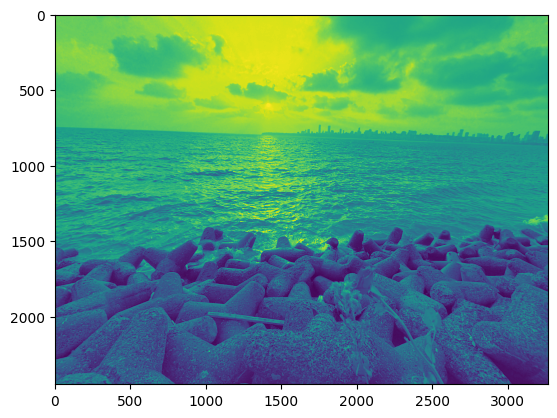

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift, ifft2, ifftshift
from PIL import Image

image_path = "/content/IMG20230426182641.jpg"
input_image = np.array(Image.open(image_path).convert("L"))

input_image_fft = fft2(input_image)
fft_shifted = fftshift(input_image_fft)
plt.imshow(input_image)

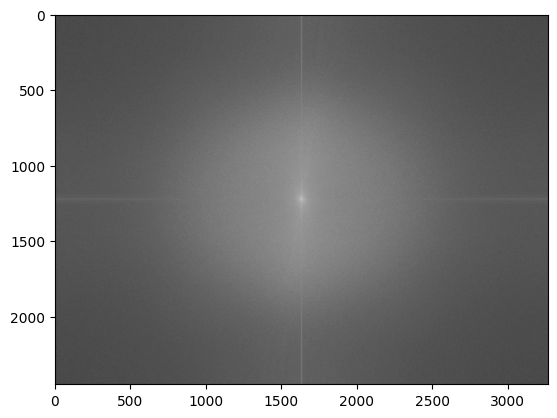

In [72]:
plt.imshow(np.log(np.abs(fft_shifted)), cmap='gray')

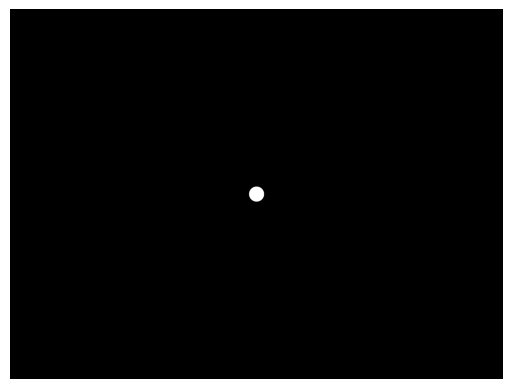

In [74]:
M,N = input_image.shape
H=np.zeros((M,N),dtype=np.float32)
D0=50
for u in range(M):
  for v in range(N):
    D=np.sqrt((u-M/2)**2 + (v-N/2)**2)
    if D<=D0:
      H[u,v]=1
    else:
      H[u,v]=0
plt.imshow(H,cmap='gray')
plt.axis('off')
plt.show()

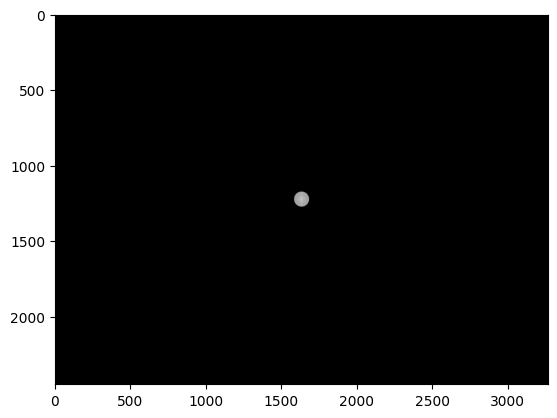

In [75]:
Gshift=fft_shifted*H
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')

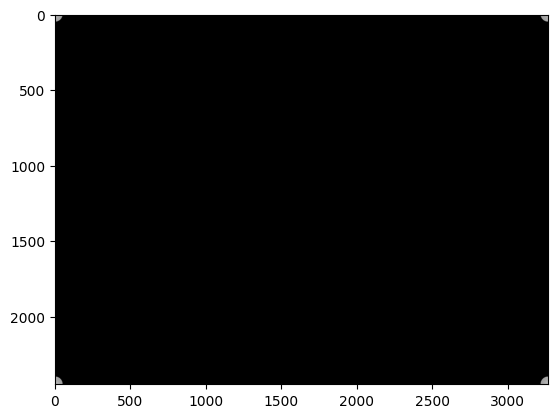

In [76]:
G=np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')

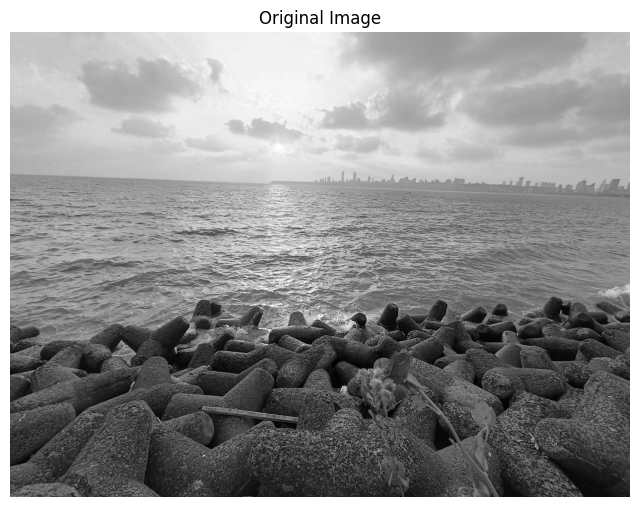

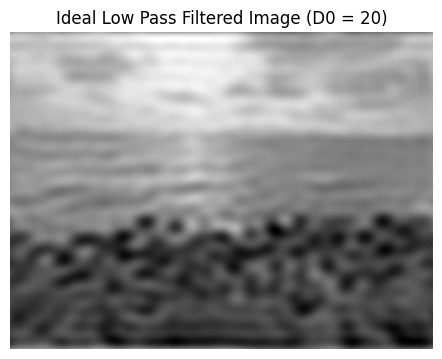

In [98]:
input_image_fft = fft2(input_image)
fft_shifted = fftshift(input_image_fft)
M, N = input_image.shape
u, v = np.meshgrid(np.arange(-N/2, N/2), np.arange(-M/2, M/2))
D_uv = np.sqrt(u**2 + v**2)

D0 = 20

H_uv_low_pass = np.where(D_uv <= D0, 1, 0)

H_uv_low_pass_resized = np.zeros_like(fft_shifted)
H_uv_low_pass_resized[M//2-D_uv.shape[0]//2:M//2+D_uv.shape[0]//2+1, N//2-D_uv.shape[1]//2:N//2+D_uv.shape[1]//2+1] = H_uv_low_pass

filtered_fft_low_pass = fft_shifted * H_uv_low_pass_resized

filtered_image_low_pass = np.abs(ifft2(ifftshift(filtered_fft_low_pass)))

plt.figure(figsize=(8, 8))
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(filtered_image_low_pass, cmap='gray')
plt.title('Ideal Low Pass Filtered Image (D0 = {})'.format(D0))
plt.axis('off')

plt.show()

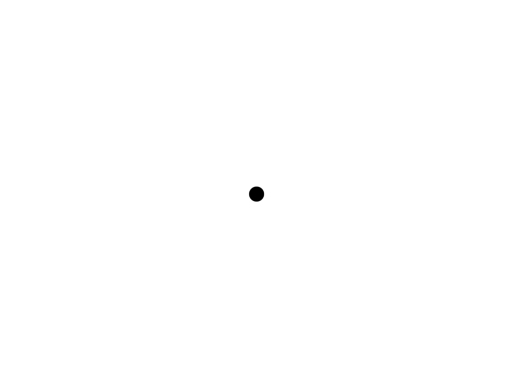

In [77]:
#Ideal High Pass Filter
H=np.zeros((M,N),dtype=np.float32)
D0=50
for u in range(M):
  for v in range(N):
    D=np.sqrt((u-M/2)**2 + (v-N/2)**2)
    if D<=D0:
      H[u,v]=0
    else:
      H[u,v]=1
plt.imshow(H,cmap='gray')
plt.axis('off')
plt.show()

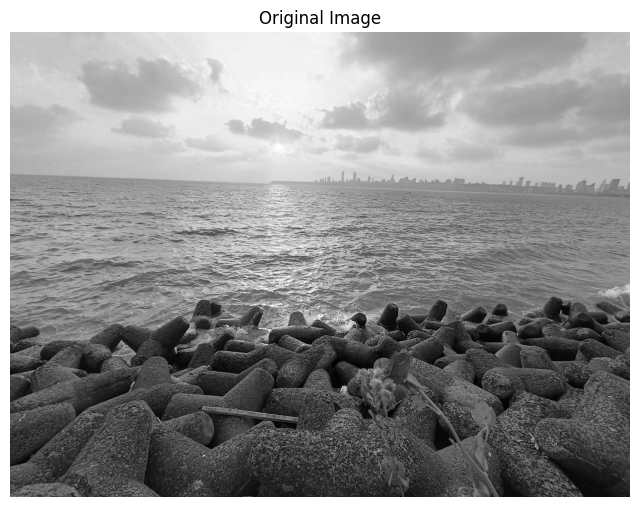

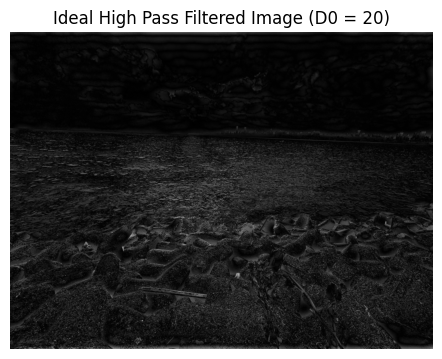

In [73]:
fft_shifted = fftshift(input_image_fft)

M, N = input_image.shape
u, v = np.meshgrid(np.arange(-N/2, N/2), np.arange(-M/2, M/2))
D_uv = np.sqrt(u**2 + v**2)

D0 = 20

H_uv_high_pass = np.where(D_uv <= D0, 0, 1)

H_uv_high_pass_resized = np.zeros_like(fft_shifted)
H_uv_high_pass_resized[M//2-D_uv.shape[0]//2:M//2+D_uv.shape[0]//2+1, N//2-D_uv.shape[1]//2:N//2+D_uv.shape[1]//2+1] = H_uv_high_pass

filtered_fft_high_pass = fft_shifted * H_uv_high_pass_resized

filtered_image_high_pass = np.abs(ifft2(ifftshift(filtered_fft_high_pass)))

plt.figure(figsize=(8, 8))
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(filtered_image_high_pass, cmap='gray')
plt.title('Ideal High Pass Filtered Image (D0 = {})'.format(D0))
plt.axis('off')

plt.show()


In [79]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

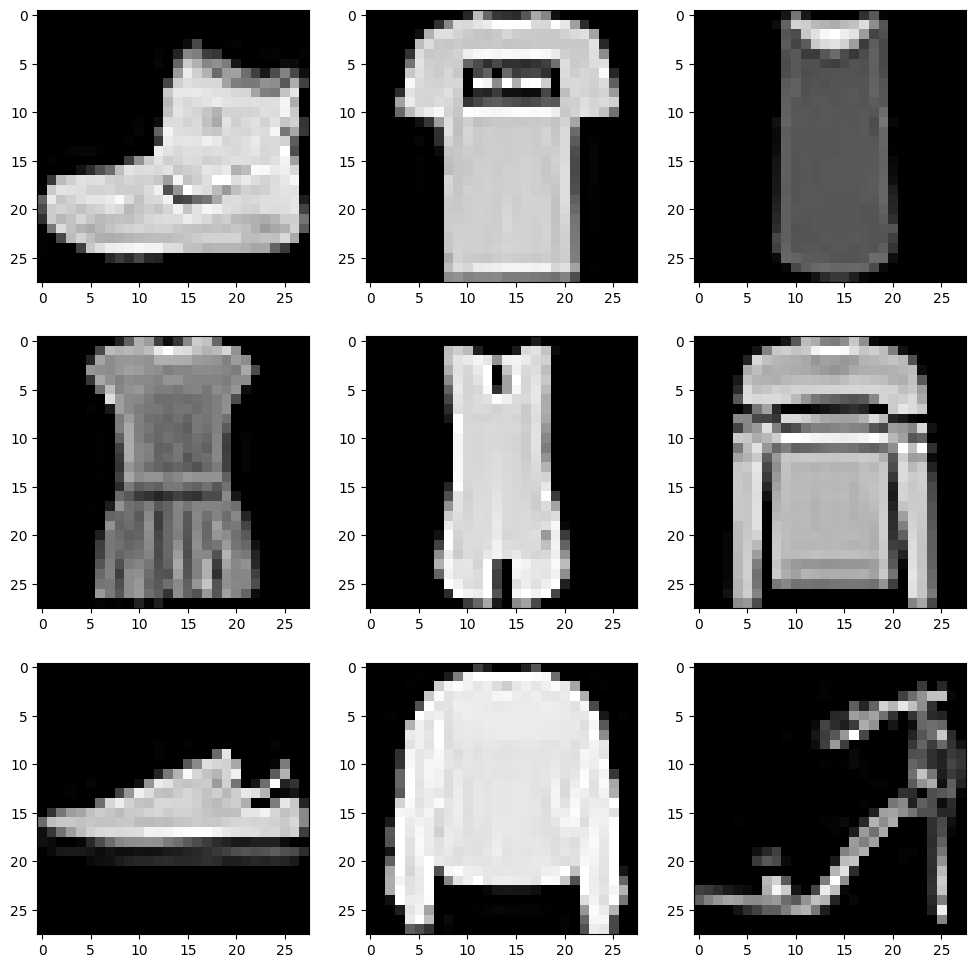

In [80]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
plt.figure(figsize=(12, 12))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_X[i], cmap='gray')
plt.show()

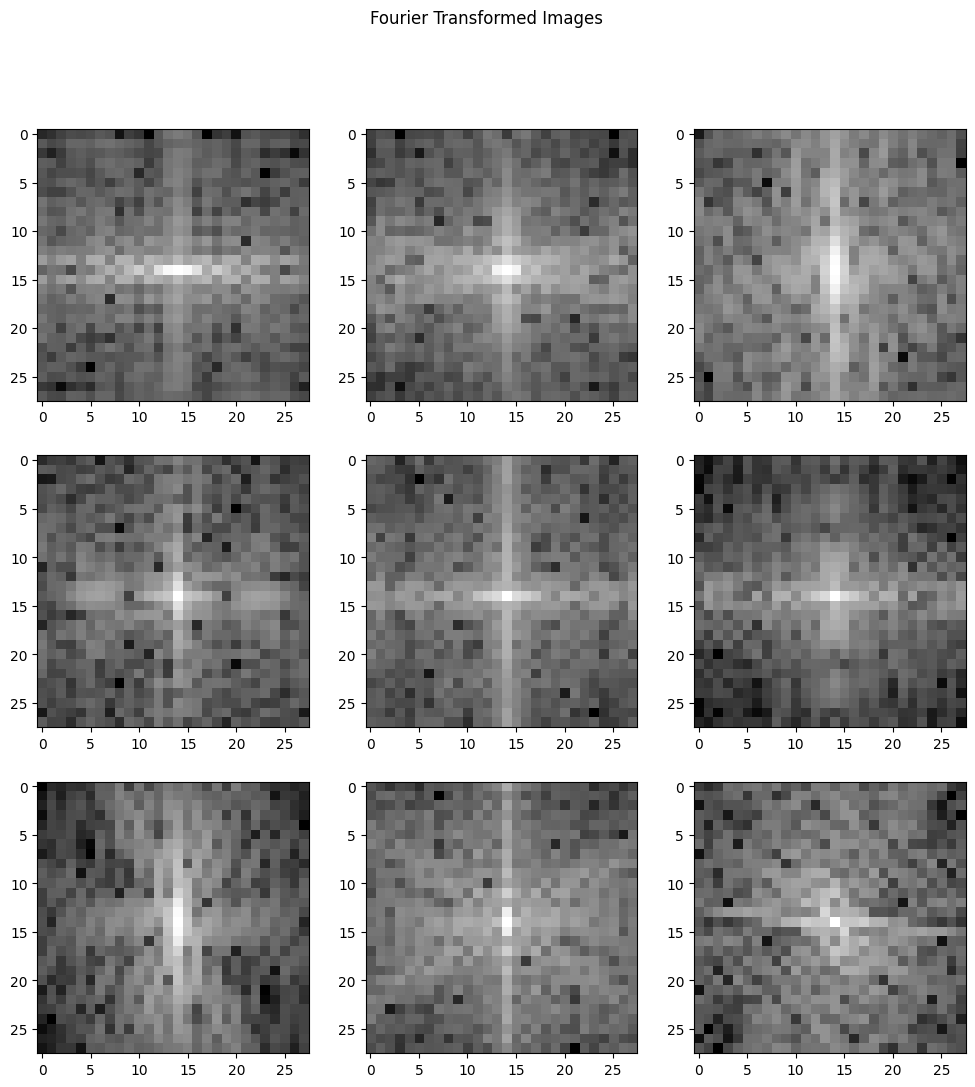

In [81]:
train_X_fft = np.fft.fft2(train_X)
train_X_fft_shifted = np.fft.fftshift(train_X_fft)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.log(np.abs(train_X_fft_shifted[i])), cmap='gray')
plt.suptitle('Fourier Transformed Images')
plt.show()

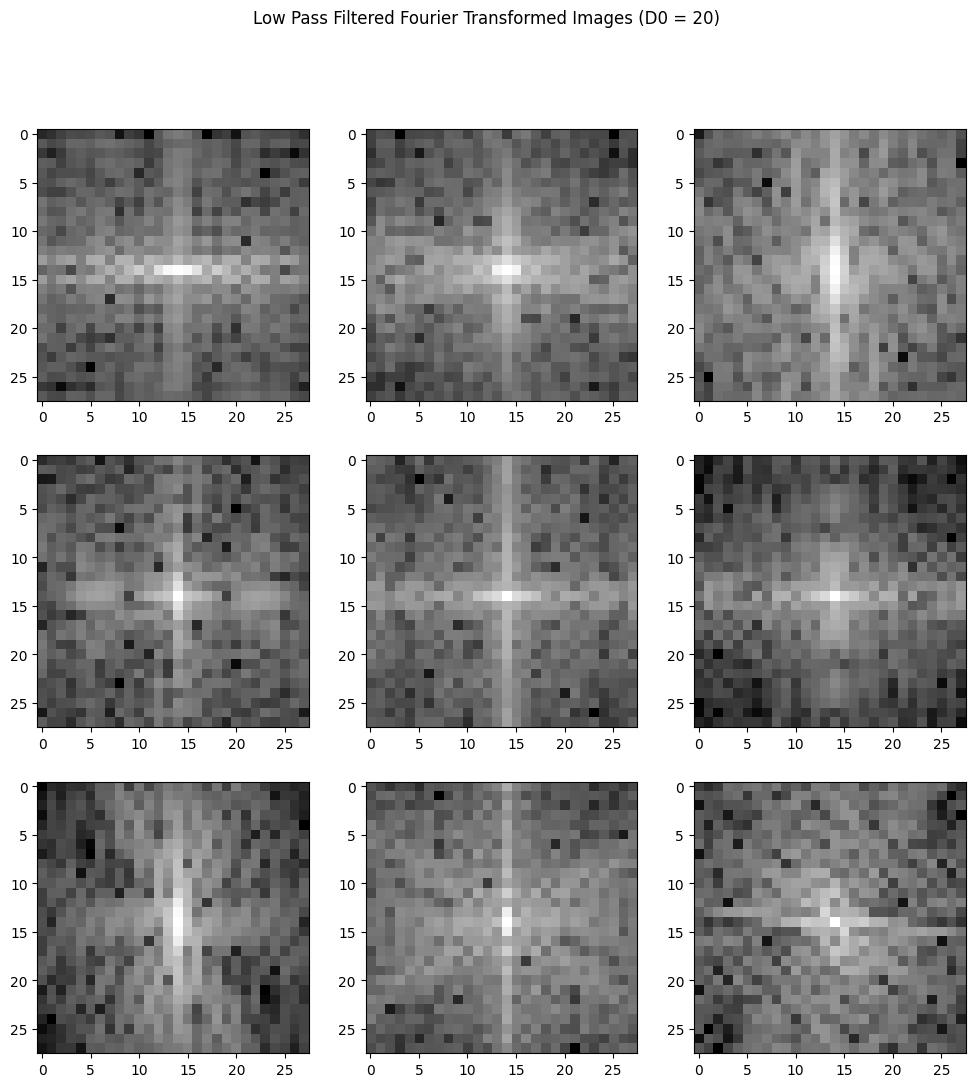

In [82]:
D0_low_pass = 20

M, N = train_X.shape[1], train_X.shape[2]
u, v = np.meshgrid(np.arange(-N/2, N/2), np.arange(-M/2, M/2))
D_uv = np.sqrt(u**2 + v**2)
H_uv_low_pass = np.where(D_uv <= D0_low_pass, 1, 0)

filtered_fft_low_pass = train_X_fft_shifted * H_uv_low_pass

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.log(np.abs(filtered_fft_low_pass[i])), cmap='gray')
plt.suptitle('Low Pass Filtered Fourier Transformed Images (D0 = {})'.format(D0_low_pass))
plt.show()


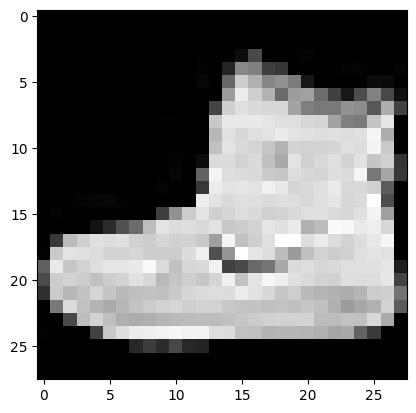

In [86]:
g=np.abs(np.fft.ifft2(G))
plt.imshow(g,cmap='gray')

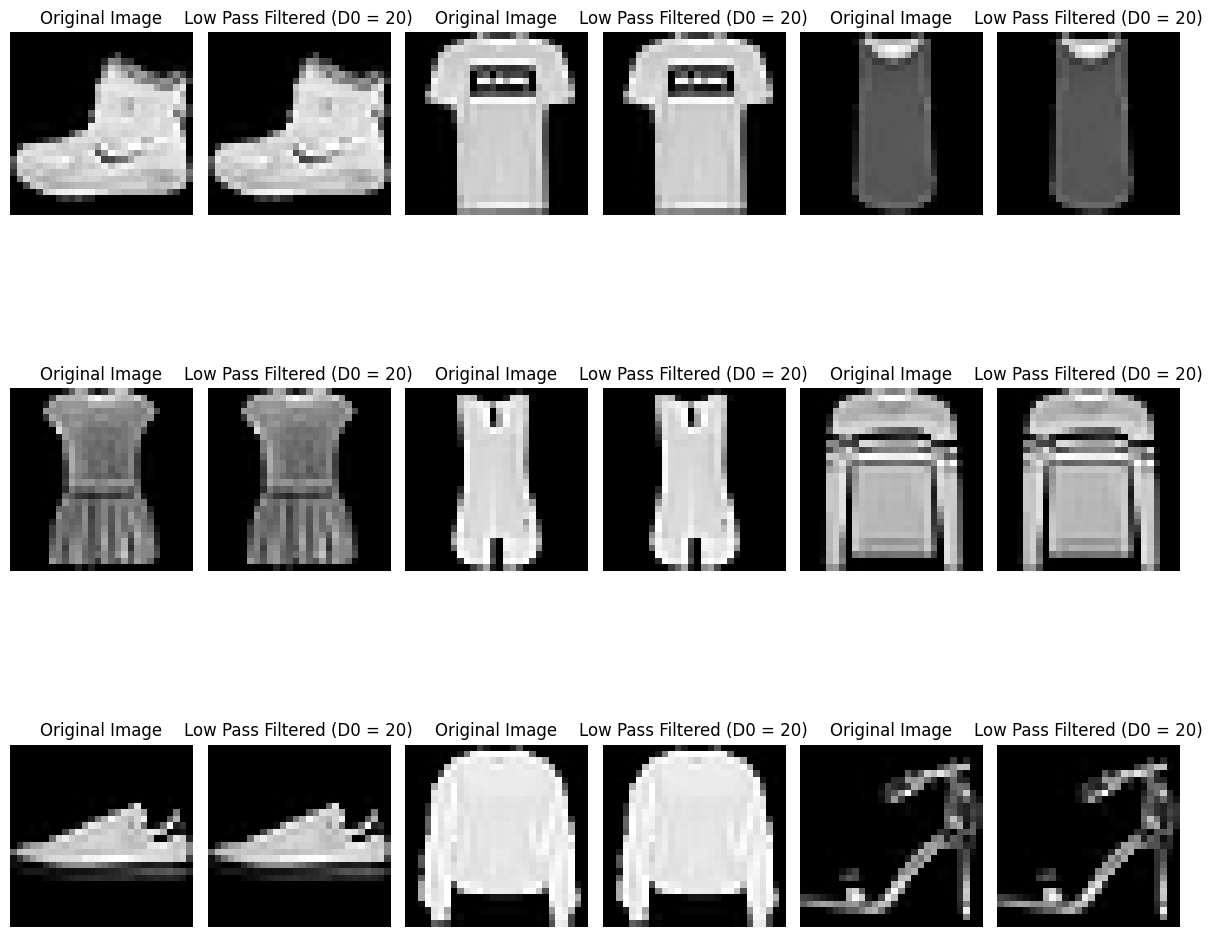

In [101]:
M, N = train_X.shape[1:]
u, v = np.meshgrid(np.arange(-N/2, N/2), np.arange(-M/2, M/2))
D_uv = np.sqrt(u**2 + v**2)

D0 = 20

H_uv_low_pass = np.where(D_uv <= D0, 1, 0)

H_uv_low_pass_resized = np.zeros((len(train_X), M, N))
for i in range(len(train_X)):
    H_uv_low_pass_resized[i, M//2-D_uv.shape[0]//2:M//2+D_uv.shape[0]//2+1, N//2-D_uv.shape[1]//2:N//2+D_uv.shape[1]//2+1] = H_uv_low_pass

filtered_images_low_pass = []
for i in range(len(train_X)):
    input_image_fft = fft2(train_X[i])
    fft_shifted = fftshift(input_image_fft)
    filtered_fft_low_pass = fft_shifted * H_uv_low_pass_resized[i]
    filtered_image_low_pass = np.abs(ifft2(ifftshift(filtered_fft_low_pass)))
    filtered_images_low_pass.append(filtered_image_low_pass)

# Plotting
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 6, 2*i+1)
    plt.imshow(train_X[i], cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(3, 6, 2*i+2)
    plt.imshow(filtered_images_low_pass[i], cmap='gray')
    plt.title('Low Pass Filtered (D0 = {})'.format(D0))
    plt.axis('off')

plt.tight_layout()
plt.show()


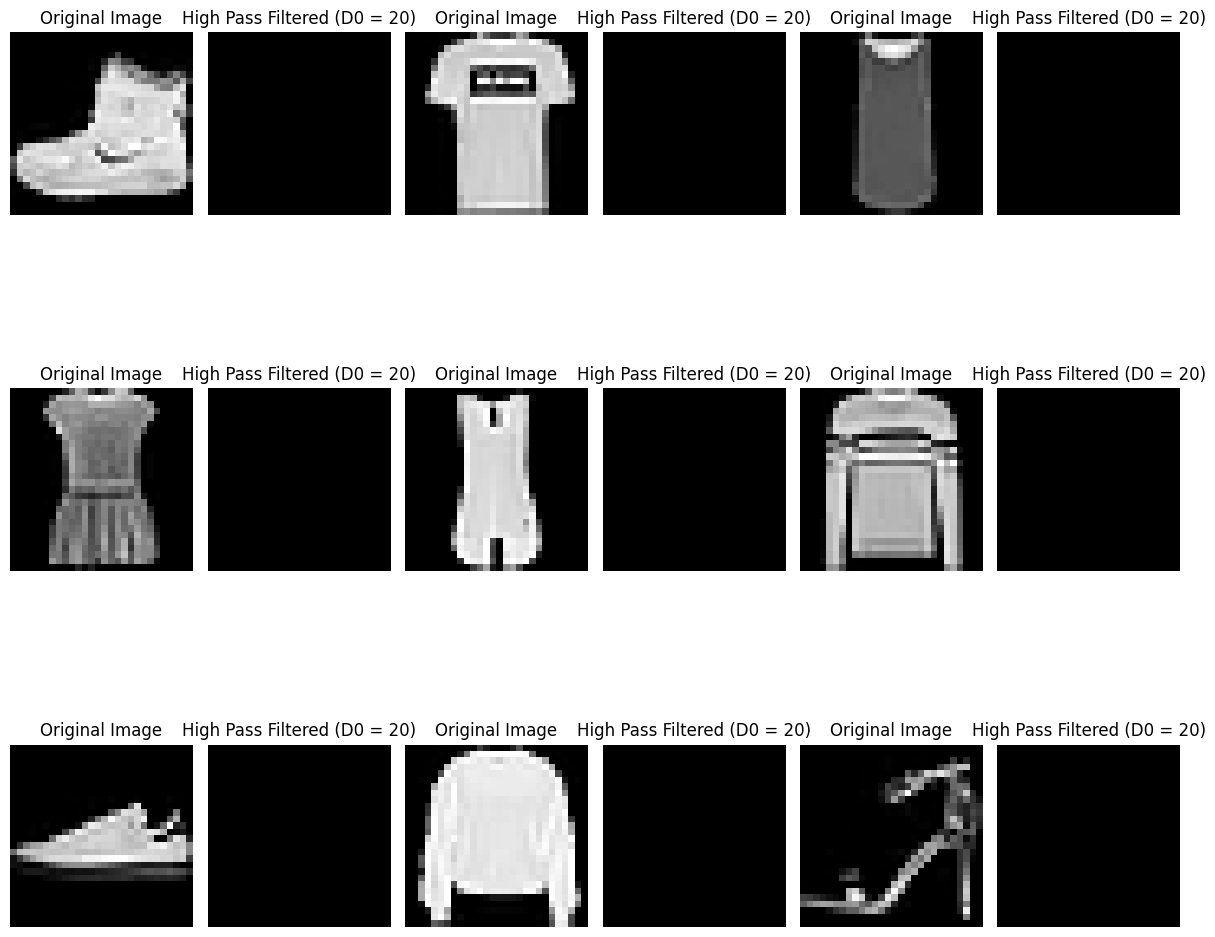

In [102]:
# Create meshgrid for frequency domain
u, v = np.meshgrid(np.arange(-N/2, N/2), np.arange(-M/2, M/2))
D_uv = np.sqrt(u**2 + v**2)

# Define cutoff frequency for high-pass filter
D0 = 20

# Define the high-pass filter
H_uv_high_pass = np.where(D_uv <= D0, 0, 1)

# Resize the filter to match the shape of the images
H_uv_high_pass_resized = np.zeros((len(train_X), M, N))
for i in range(len(train_X)):
    H_uv_high_pass_resized[i, M//2-D_uv.shape[0]//2:M//2+D_uv.shape[0]//2+1, N//2-D_uv.shape[1]//2:N//2+D_uv.shape[1]//2+1] = H_uv_high_pass

# Apply the filter to each image in the training set
filtered_images_high_pass = []
for i in range(len(train_X)):
    input_image_fft = fft2(train_X[i])
    fft_shifted = fftshift(input_image_fft)
    filtered_fft_high_pass = fft_shifted * H_uv_high_pass_resized[i]
    filtered_image_high_pass = np.abs(ifft2(ifftshift(filtered_fft_high_pass)))
    filtered_images_high_pass.append(filtered_image_high_pass)

# Plotting
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 6, 2*i+1)
    plt.imshow(train_X[i], cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(3, 6, 2*i+2)
    plt.imshow(filtered_images_high_pass[i], cmap='gray')
    plt.title('High Pass Filtered (D0 = {})'.format(D0))
    plt.axis('off')

plt.tight_layout()
plt.show()
